In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import janitor as jn
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
%matplotlib inline

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

#https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education
data = "students_adaptability_level_online_education.csv"


In [34]:
df = pd.read_csv(data)

df.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [35]:
df.shape


(1205, 14)

In [36]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [37]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [38]:
df.isnull().mean() * 100

Gender                 0.0
Age                    0.0
Education Level        0.0
Institution Type       0.0
IT Student             0.0
Location               0.0
Load-shedding          0.0
Financial Condition    0.0
Internet Type          0.0
Network Type           0.0
Class Duration         0.0
Self Lms               0.0
Device                 0.0
Adaptivity Level       0.0
dtype: float64

In [39]:
df.dropna(axis=0)   

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [40]:
clean = jn.clean_names(df)

clean

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,network_type,class_duration,self_lms,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [41]:
group = df.groupby(['Age','Education Level','Institution Type','IT Student', 'Financial Condition','Internet Type','Adaptivity Level'])['Adaptivity Level'].count().unstack()

group

Adaptivity Level                                                                    High  \
Age  Education Level Institution Type IT Student Financial Condition Internet Type         
1-5  School          Government       No         Mid                 Mobile Data     NaN   
                                                 Rich                Mobile Data     NaN   
                     Non Government   No         Mid                 Mobile Data     NaN   
                                                                     Wifi            NaN   
                                                 Poor                Mobile Data     NaN   
...                                                                                  ...   
6-10 School          Government       No         Mid                 Mobile Data     NaN   
                     Non Government   No         Mid                 Mobile Data     NaN   
                                                                     Wifi            3.0   
                                                 Poor                Mobile Data     6.0   
                                                 Rich                Wifi            8.0   

Adaptivity Level                                                                     Low  \
Age  Education Level Institution Type IT Student Financial Condition Internet Type         
1-5  School          Government       No         Mid                 Mobile Data     3.0   
                                                 Rich                Mobile Data     3.0   
                     Non Government   No         Mid                 Mobile Data     NaN   
                                                                     Wifi            5.0   
                                                 Poor                Mobile Data     6.0   
...                                                                                  ...   
6-10 School          Government       No         Mid                 Mobile Data    14.0   
                     Non Government   No         Mid                 Mobile Data     5.0   
                                                                     Wifi            NaN   
                                                 Poor                Mobile Data     5.0   
                                                 Rich                Wifi            NaN   

Adaptivity Level                                                                    Moderate  
Age  Education Level Institution Type IT Student Financial Condition Internet Type            
1-5  School          Government       No         Mid                 Mobile Data         NaN  
                                                 Rich                Mobile Data         NaN  
                     Non Government   No         Mid                 Mobile Data        29.0  
                                                                     Wifi                5.0  
                                                 Poor                Mobile Data        27.0  
...                                                                                      ...  
6-10 School          Government       No         Mid                 Mobile Data         NaN  
                     Non Government   No         Mid                 Mobile Data         5.0  
                                                                     Wifi                NaN  
                                                 Poor                Mobile Data         NaN  
                                                 Rich                Wifi                5.0  

[72 rows x 3 columns]

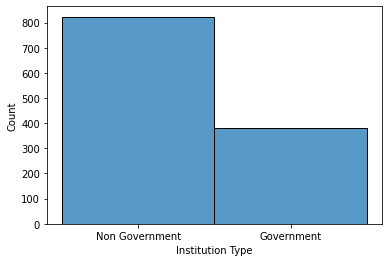

In [42]:
sns.histplot(df['Institution Type']);

In [43]:
decimal_count = round(df['Institution Type'].value_counts()*100/len(df),2)
print(decimal_count)

Non Government    68.3
Government        31.7
Name: Institution Type, dtype: float64


(array([878.,   0.,   0.,   0.,   0., 242.,   0.,   0.,   0.,  85.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

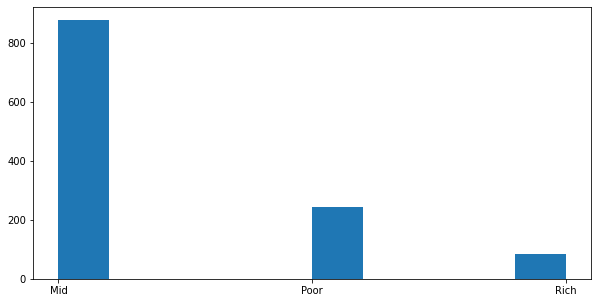

In [44]:
plt.figure(figsize=(10,5))
plt.hist(data=df, x='Financial Condition')

(array([374.,   0., 278.,   0., 353.,   0.,  68.,   0.,  51.,  81.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

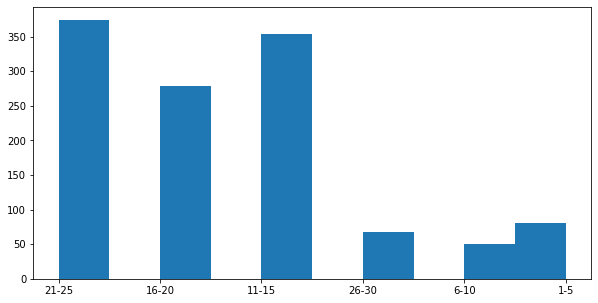

In [45]:
plt.figure(figsize=(10,5))
plt.hist(data=df, x='Age')

In [46]:
decimal_count = round(df['Adaptivity Level'].value_counts()*100/len(df),2)
print(decimal_count)

Moderate    51.87
Low         39.83
High         8.30
Name: Adaptivity Level, dtype: float64


In [47]:
internet_type	= {'Wifi': 0, 'Mobile Data': 1}
df['Internet Type'] = df['Internet Type'].map(internet_type)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,0,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,1,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,0,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,1,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,1,3G,0,No,Mobile,Low


In [48]:
financial_condition	= {'Poor': 0, 'Mid': 1, 'Rich': 2}
df['Financial Condition'] = df['Financial Condition'].map(financial_condition)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,1,0,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,1,1,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,1,0,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,1,1,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,0,1,3G,0,No,Mobile,Low


In [49]:
it_student	= {'No': 0, 'Yes': 1}
df['IT Student'] = df['IT Student'].map(it_student)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,0,Yes,Low,1,0,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,0,Yes,High,1,1,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,0,Yes,Low,1,0,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,0,Yes,Low,1,1,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,0,Yes,Low,0,1,3G,0,No,Mobile,Low


In [50]:
institution_type = {'Non Government': 0, 'Government': 1}
df['Institution Type'] = df['Institution Type'].map(institution_type)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,0,0,Yes,Low,1,0,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,0,0,Yes,High,1,1,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,1,0,Yes,Low,1,0,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,0,0,Yes,Low,1,1,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,0,0,Yes,Low,0,1,3G,0,No,Mobile,Low


In [51]:
education_level = {"University": 1, "College": 2, "School": 3}
df['Education Level'] = df['Education Level'].map(education_level)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,1,0,0,Yes,Low,1,0,4G,3-6,No,Tab,Moderate
1,Girl,21-25,1,0,0,Yes,High,1,1,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,2,1,0,Yes,Low,1,0,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,3,0,0,Yes,Low,1,1,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,3,0,0,Yes,Low,0,1,3G,0,No,Mobile,Low


In [52]:
gender_mapping = {"Boy": 0, "Girl": 1}
df['Gender'] = df['Gender'].map(gender_mapping)
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,21-25,1,0,0,Yes,Low,1,0,4G,3-6,No,Tab,Moderate
1,1,21-25,1,0,0,Yes,High,1,1,4G,1-3,Yes,Mobile,Moderate
2,1,16-20,2,1,0,Yes,Low,1,0,4G,1-3,No,Mobile,Moderate
3,1,11-15,3,0,0,Yes,Low,1,1,4G,1-3,No,Mobile,Moderate
4,1,16-20,3,0,0,Yes,Low,0,1,3G,0,No,Mobile,Low


In [53]:
X = df.drop(columns=['Age', 'Gender','Location', 'Load-shedding', 'Network Type', 'Class Duration', 'Self Lms', 'Device','Adaptivity Level'], axis=1)
y = df['Adaptivity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((964, 5), (241, 5), (964,), (241,))

In [54]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
np.sqrt(1205*0.2) 

15.524174696260024

In [56]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [57]:
y_previsao = classifier.predict(X_test)
y_previsao

array(['Low', 'Low', 'Low', 'Moderate', 'Moderate', 'Low', 'Low', 'Low',
       'Low', 'Moderate', 'Moderate', 'Low', 'Moderate', 'Low',
       'Moderate', 'Low', 'Low', 'Low', 'Moderate', 'Low', 'Moderate',
       'Moderate', 'Low', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Low',
       'Low', 'Low', 'Moderate', 'Low', 'High', 'Low', 'Low', 'Moderate',
       'Moderate', 'Moderate', 'High', 'Moderate', 'High', 'Low', 'Low',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Low',
       'Low', 'Low', 'Low', 'Moderate', 'Low', 'Moderate', 'Low',
       'Moderate', 'Moderate', 'Moderate', 'Low', 'Moderate', 'Low',
       'Low', 'Moderate', 'Low', 'Moderate', 'Moderate', 'Low',
       'Moderate', 'High', 'Moderate', 'Moderate', 'Low', 'Moderate',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Moderate', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Moderate', 'Low', 'Low', 'Moderate',
       'Mod

<AxesSubplot:xlabel='Predicted', ylabel='Real'>

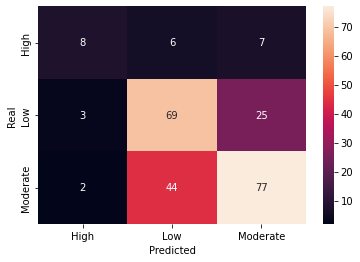

In [58]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_previsao, rownames=['Real'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_previsao) * 100

63.90041493775933

In [60]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actually'>

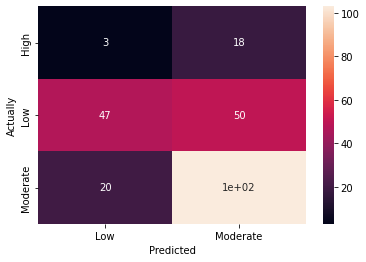

In [61]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actually'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

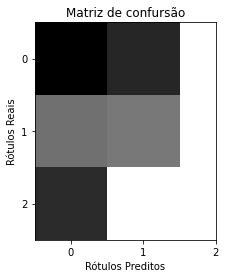

In [62]:
confusion_matrix = pd.crosstab(y_test, y_pred)
plt.imshow(confusion_matrix, cmap = plt.cm.gray)
plt.title("Matriz de confursão")
plt.colorbar
ticks = np.arange(3)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.xlabel("Rótulos Preditos")
plt.ylabel("Rótulos Reais")
plt.show()


In [63]:
from sklearn import metrics
print('Acuraica: ',metrics.accuracy_score(y_test, y_pred) * 100)
plt.show()

Acuraica:  62.24066390041494
